#Predicting Wage of Fifa Players with KNN

##### By Suji Hancock, Bohnny Vonan, Soham Prabhu



Soccer is one of the most widely celebrated sport in the world. Many video games have been made which are based on this sport but one of the most famous soccer games that has been around for a while is FIFA series, by EA Sports. From 1993, EA Sports has been releasing a new FIFA game every year. In 2020, they launched a new game, FIFA 21, which had a lot of amazing features and data in it.

In this notebook, we will explore a FIFA21 dataset to predict a player's wage based on several different features. A few of these features include, 'Overall', 'Potential', and 'Skill Moves'. We will examine the data of various type of players by using the data set hosted on [Kaggle](https://www.kaggle.com/datasets/mukeshmanral/fifa-data-for-eda-and-stats).

We focus on 4 things:


*   Data exploration and cleaning
*   Visualization

*   KNN Regression

*   Linear regression



We will be using linear regression and knn regression to predict the wage of players based on the the best features from these two algorithms.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree

### Read the data

In [2]:
input_file = "https://raw.githubusercontent.com/suji-hancock/cst383-project2-dataset/main/fifa_eda_stats.csv"
df = pd.read_csv(input_file)

###Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [4]:
df['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [5]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Let's see what fraction of columns contains NA values over 5%.

In [6]:
df.isna().mean().sort_values()[df.isna().mean().sort_values() > 0.05]

Joined            0.085297
Release Clause    0.085901
Loaned From       0.930576
dtype: float64

Let's look at the distribution of 'Overall' of players in the range 40 - 100.


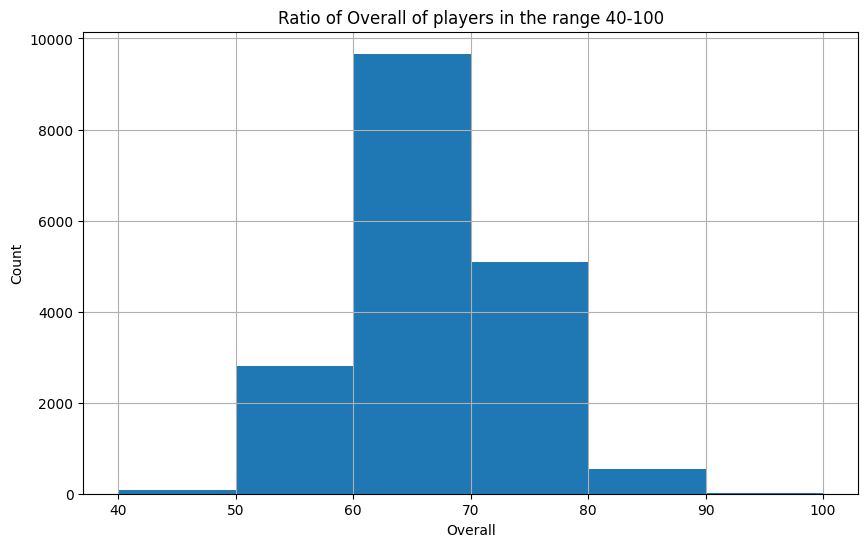

In [7]:
fig,ax=plt.subplots(figsize=(10,6))
ax.grid(which='major', axis='both', linestyle='-')
plt.hist(df['Overall'], bins=range(40,110,10))
plt.title('Ratio of Overall of players in the range 40-100')
plt.xlabel('Overall')
plt.ylabel('Count');

## Preprocessing Data

'Loaned From' contains more than 93% NA values so we will drop that column and rows that have NA values.

In [8]:
df.drop('Loaned From', axis=1, inplace=True)
df.dropna(inplace=True, axis='rows')
df.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

Features such as, 'ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Joined', 'Loaned From', and 'Contract Valid Until' are not useful for our machine learning algorithm so we will drop them.

In [9]:
df.drop(columns=['ID', 'Name', 'Nationality', 'Club'], inplace=True)

'Wage' and 'Weight' will be converted from an object to int64 for easier use.

In [10]:
# Reference: https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular
df['Wage'] = df['Wage'].str.extract('(\d+)', expand=False)
df['Wage'] = df['Wage'].astype(int)
df['Wage']=df['Wage']
df['Wage'].head()

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int64

One thing to note here is that the wages are actually the values we see in our data set multiplied by thousand. For example if the wage of a player is 565 it means that their weekly wages are €565,000.

In [11]:
df['Wage'].unique()

array([565, 405, 290, 260, 355, 340, 420, 455, 380,  94, 205, 125, 285,
       225, 145, 240, 315, 200, 130, 300, 215, 100, 255, 165, 265, 160,
       150, 110,  77, 115, 210, 195, 230, 250, 135, 155, 180, 175, 190,
       185,  21,  82,  73,  92,  88,  96, 170,  66,  28, 105,  38,  81,
        57,  15,  63,  22,  84, 120,  90,  72,  93,  45,  74,  51,  42,
        31,  75,  25, 140,  41,  78,  53,  95,  80,  43,  60,  85,  64,
        67,  70,  91,  20,  49,  87,  86,  26,  29,  55,  35,  33,  56,
        30,  11,  59,  23,  46,  39,  32,  36,  98,  54,  68,  58,  27,
        40,  44,  19,   1,  61,  50,  99,  18,  17,  52,  62,  12,  10,
        71,  14,  76,  65,  69,  24,  34,  16,  37,  47,  89,  97,  48,
        79,  13,  83,   6,   3,   9,   8,   7,   4,   2,   5])

In [12]:
df['Weight'] = df['Weight'].str.extract('(\d+)', expand=False)
df['Weight'] = df['Weight'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16643 non-null  int64  
 1   Overall                   16643 non-null  int64  
 2   Potential                 16643 non-null  int64  
 3   Value                     16643 non-null  object 
 4   Wage                      16643 non-null  int64  
 5   Preferred Foot            16643 non-null  object 
 6   International Reputation  16643 non-null  float64
 7   Weak Foot                 16643 non-null  float64
 8   Skill Moves               16643 non-null  float64
 9   Work Rate                 16643 non-null  object 
 10  Body Type                 16643 non-null  object 
 11  Position                  16643 non-null  object 
 12  Jersey Number             16643 non-null  float64
 13  Joined                    16643 non-null  object 
 14  Contra

In [14]:
df['Work Rate'].value_counts()

Medium/ Medium    9019
High/ Medium      2886
Medium/ High      1572
High/ High         931
Medium/ Low        769
High/ Low          621
Low/ Medium        413
Low/ High          404
Low/ Low            28
Name: Work Rate, dtype: int64

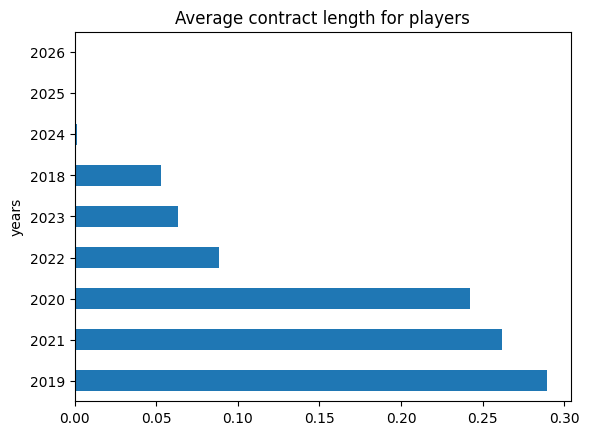

In [15]:
df['Contract Valid Until'].value_counts(normalize=True).plot.barh()
plt.ylabel('years')
plt.title('Average contract length for players');

Most of the players have contracts valid until 2019. Considering the game was released in 2020, it means that these players are free agents. Being free agents, these players don't belong to a club and their wages aren't as high, compared to those who do belong in a club.

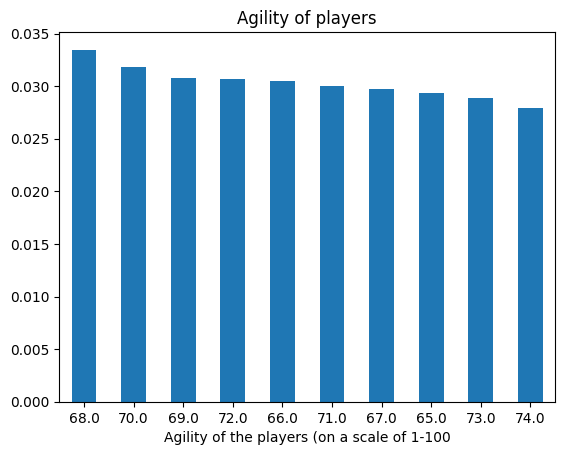

In [16]:
df['Agility'].value_counts(ascending=False,normalize=True).head(10).plot.bar(rot=0)
plt.xlabel('Agility of the players (on a scale of 1-100')
plt.title('Agility of players');

Let us look at how the release clause for the players in our data set look like.

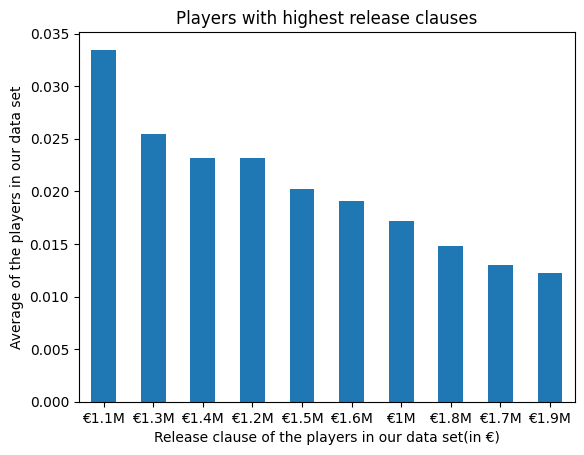

In [17]:
df['Release Clause'].value_counts(ascending=False,normalize=True).head(10).plot.bar(rot=0)
plt.xlabel('Release clause of the players in our data set(in €)')
plt.ylabel('Average of the players in our data set')
plt.title('Players with highest release clauses');

Release clause basically means a clause where a club could pay the amount set by the parent club and the player can join that club without any futher negotiations. Players who have a really high release clause means that they are really valuable to the club and are ready to let them go only if they are ready to pay an exorbitant amount. We can see that most of the players have €1.1 million release clause, which is not that much. That could mean that the clubs value the players but are ready to let them go for a fee, which could benefit them in some other aspects of their club's running.

In [18]:
median_wage = df['Wage'].median()
print(f'Median wage: €{median_wage:.3f}')

Median wage: €3.000


## Visualization

Let us look at the ages of the players in our data set.

When it comes to sports, usually the younger players are very valuable. It is very rare that a team would pay someone to play whos over the age of 35. Lets see the ages of different players.

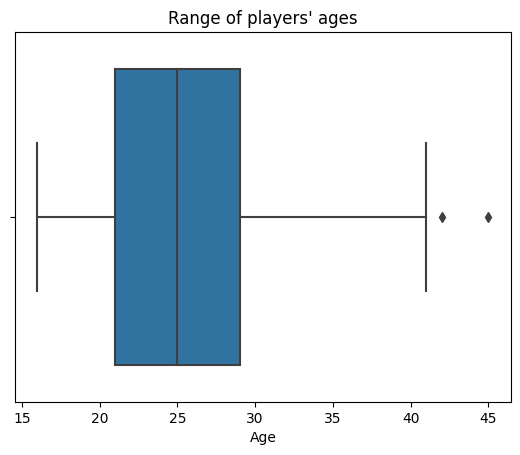

In [19]:
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title("Range of players' ages");

From this graph, we can see that the median range of players is 25. We also see that most players are in their mid 20's with a few outliers of players being in their 40's. This can be an inference to the fact that a lot more players have the best time in their footballing careers in their mid 20's. Not many players can last in the game till their 30's.

Let us see how age is correlated to the wages of the players.

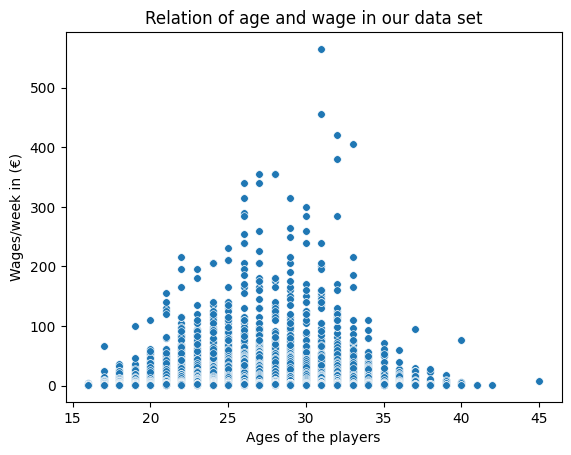

In [20]:
sns.scatterplot(x='Age', y='Wage',s=30,data=df)
plt.xlabel('Ages of the players')
plt.ylabel('Wages/week in (€)')
plt.title('Relation of age and wage in our data set');

We can see that a lot of players earn under €100k. A very few earn above €200k. This might be because most of the clubs in our dataset might not be eas powerful financially as some of the others. Also the highest earner in our data set is almost 31 years old. One inference might be that he is the best player in the game.

Let us look at the distribution of the overall rating of the players in the game. Overall is a scale to show how good the player is. Greater the overall better the player.

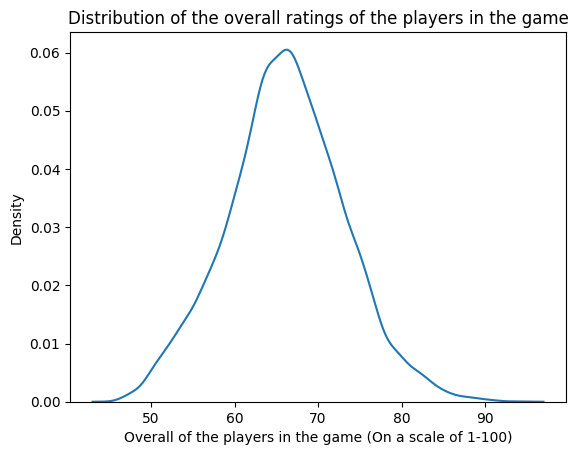

In [21]:
sns.kdeplot(df['Overall'])
plt.xlabel('Overall of the players in the game (On a scale of 1-100)')
plt.title('Distribution of the overall ratings of the players in the game');

We can that see a lot more players overall ratings between 65-70. Thus we can infer that the average player in the game will have ratings between 65 and 70. We can also a lot less players with overalls greater than 80. These players are definitely the best players in the game.

Let us see if the overall has any affect on the wages of the players.

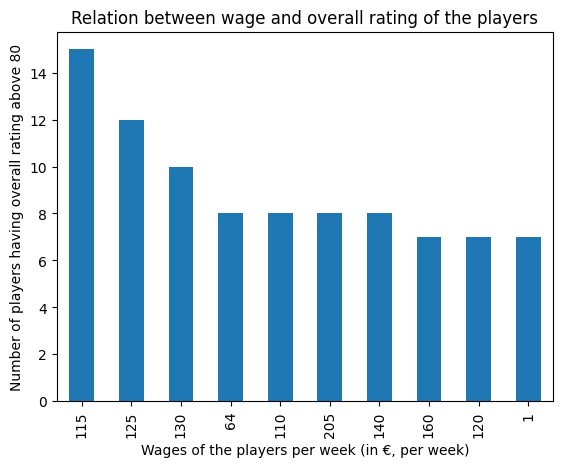

In [22]:
df['Wage'][df['Overall']>80].value_counts(ascending=False).head(10).plot.bar()
plt.xlabel('Wages of the players per week (in €, per week)')
plt.ylabel('Number of players having overall rating above 80')
plt.title('Relation between wage and overall rating of the players');

We can see that maximum players having more than 80 overall earn about €115k per week. We know the players above the overall of 80 are really good players. So having more than €100k wages means that they are really paid well for the role they play in the club. Also we can infer that these players are the ones playing for top clubs in the world.

Let us look at how the potential ratings for the players in our data set is distributed. Potential of a player shows us how good the player can be,  based on the scale of overall ratings. Better the potential of the player means the player can turn out to be that good if played appropriately.

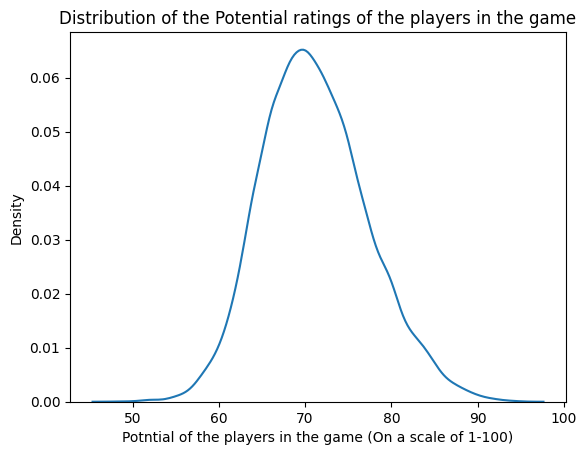

In [23]:
sns.kdeplot(df['Potential'])
plt.xlabel('Potntial of the players in the game (On a scale of 1-100)')
plt.title('Distribution of the Potential ratings of the players in the game');

We see a lot of the players potentials distributed between the range of 65-70. This might be a reference to the fact that the players might not improve much more than they already did. Very few have a potential rating above 80, which leads to the conclusion that very few players can turn out to be the best players in the game.

Now let us look if potential and wages are related in any ways.

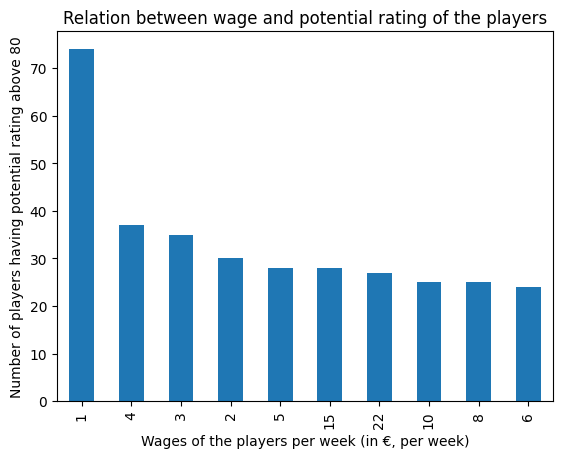

In [24]:
df['Wage'][df['Potential']>80].value_counts(ascending=False).head(10).plot.bar()
plt.xlabel('Wages of the players per week (in €, per week)')
plt.ylabel('Number of players having potential rating above 80')
plt.title('Relation between wage and potential rating of the players');

Now this is a really interesting plot to notice. A lot of players above the potential of 80 are earning merely a few 1000 pounds. This shows us that a lot of these players are still trying to break into the footballing scene. This shows us that if they trained and played appropriately and given the chance to show their potential they might turn out to be great players. However as of now, they are not earning as much as they should.

Let's take a look at the ratio of different types of positions a player can play and what footing they prefer. The position the play may have to do with what foot they play with.

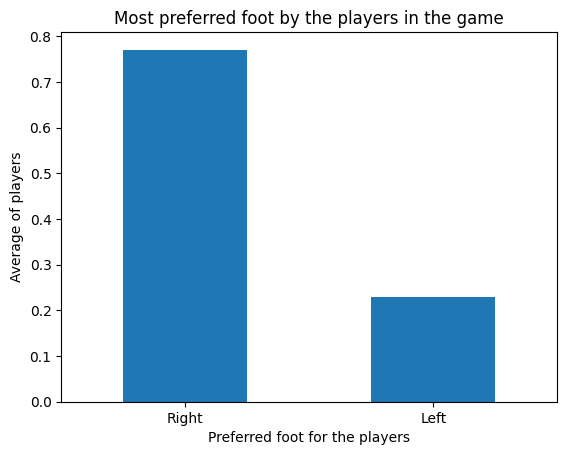

In [25]:
df['Preferred Foot'].value_counts(normalize=True).plot.bar(rot=0)
plt.xlabel('Preferred foot for the players')
plt.ylabel('Average of players')
plt.title('Most preferred foot by the players in the game');

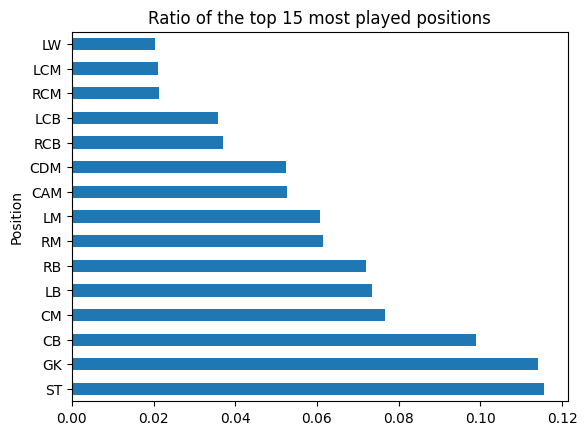

In [26]:
df['Position'].value_counts(normalize=True)[:15].plot.barh()
plt.ylabel('Position')
plt.title('Ratio of the top 15 most played positions');

Most players seem to be a left wing which means they are on the offense and they are right footed. This may lead to the question of how long certain players get to play these positions. Next we will look at a visulalization of the players contracts.

## Machine Learning

We are going to be predicting the wage in our dataset by using  Knn Regression and Linear regression.

We are going to be dropping the release clause column because the integer data is too high.

In [27]:
df.drop(columns=['Release Clause'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16643 non-null  int64  
 1   Overall                   16643 non-null  int64  
 2   Potential                 16643 non-null  int64  
 3   Value                     16643 non-null  object 
 4   Wage                      16643 non-null  int64  
 5   Preferred Foot            16643 non-null  object 
 6   International Reputation  16643 non-null  float64
 7   Weak Foot                 16643 non-null  float64
 8   Skill Moves               16643 non-null  float64
 9   Work Rate                 16643 non-null  object 
 10  Body Type                 16643 non-null  object 
 11  Position                  16643 non-null  object 
 12  Jersey Number             16643 non-null  float64
 13  Joined                    16643 non-null  object 
 14  Contra

In [29]:
df['Value'] = df['Value'].str.extract('(\d+)', expand=False)
df['Value'] = df['Value'].astype(int)
df['Value']=df['Value']*1000

In [30]:
df['Value'].head()

0    110000
1     77000
2    118000
3     72000
4    102000
Name: Value, dtype: int64

###KNN Regression

Our target variable is wage and we want to use the following predictor variables for our machine learning algorithm. We specifically chose our predictor types to be ints and floats.

In [31]:
target = 'Wage'
predictors = ['Age','Overall','Potential','Skill Moves','Weak Foot','Crossing','Finishing','International Reputation','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)

We will use SelectKBest to find the best features in relation to the highest score of k.

In [32]:
selector = SelectKBest(mutual_info_regression, k=15)
selector.fit(X_train, y_train)
X_train_best = selector.transform(X_train)
X_test_best = selector.transform(X_test)

We'll scale the data here.

In [33]:
scaler = StandardScaler()
scaler.fit(X_train_best)
X_train_best = scaler.transform(X_train_best)
X_test_best = scaler.transform(X_test_best)


We will be running two Knn Regression models. The first model will be with features of size 15 and the second model will be of size 10. We are doing this to see how well our algorithim performs based on these two different sizes.

In [34]:
regr = KNeighborsRegressor()
params = {"n_neighbors" : range(1,22)}
grid = GridSearchCV(regr,params, cv=10)
grid.fit(X_train_best, y_train);


In [35]:
y_pred = grid.predict(X_test_best)

In [36]:
grid.best_params_

{'n_neighbors': 10}

###Knn Regression model 1

In [37]:
mse_blind = ((y_train.mean() - y_train)**2).mean()
Train_RMSE=np.sqrt(mse_blind).round(3)
print("Baseline RMSE:",Train_RMSE)

Baseline RMSE: 22.478


In [38]:
mse = ((y_pred - y_test)**2).mean()
RMSE=np.sqrt(mse).round(3)
print("Test RMSE:",RMSE)

Test RMSE: 11.563


We can see that the test RMSE is less than the baseline RMSE, showing that our machine learning algorithim has performed well.

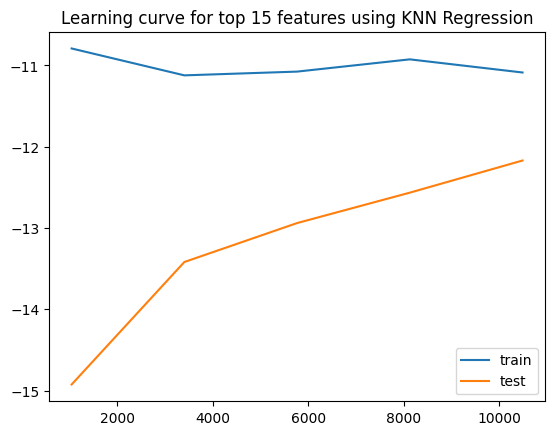

In [39]:
train_sizes, train_scores, test_scores = \
learning_curve(grid.best_estimator_, X_train_best, y_train, cv=10,scoring='neg_root_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve for top 15 features using KNN Regression');
plt.legend();

This learning curve shows that test and training data are slightly off from each other, about 1.

###Knn Regression model 2

In [40]:
target = 'Wage'
predictors = ['Age','Overall','Potential','Skill Moves','Weak Foot','Crossing','Finishing','International Reputation','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X_train, y_train)
X_train_best = selector.transform(X_train)
X_test_best = selector.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_best)
X_train_best = scaler.transform(X_train_best)
X_test_best = scaler.transform(X_test_best)
regr = KNeighborsRegressor()
params = {"n_neighbors" : range(1,22)}
grid = GridSearchCV(regr,params, cv=10)
grid.fit(X_train_best, y_train);
y_pred = grid.predict(X_test_best)

In [41]:
mse_blind = ((y_train.mean() - y_train)**2).mean()
Train_RMSE=np.sqrt(mse_blind).round(3)
print("Baseline RMSE:",Train_RMSE)

Baseline RMSE: 22.478


In [42]:
mse = ((y_pred - y_test)**2).mean()
RMSE=np.sqrt(mse).round(3)
print("Test RMSE:",RMSE)

Test RMSE: 11.886


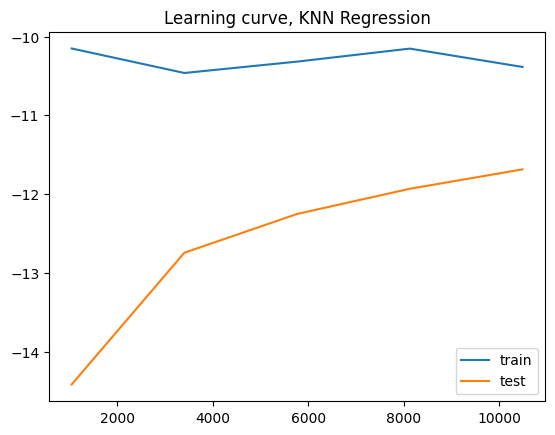

In [43]:
train_sizes, train_scores, test_scores = \
learning_curve(grid.best_estimator_, X_train_best, y_train, cv=10,scoring='neg_root_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, KNN Regression')
plt.legend();

We can see that as the feature size decreases, the test RMSE score increases.

##Linear Regression

We will now be performing linear regression to compare the results of our knn regression algorithim.

In [44]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred1 = linear_reg.predict(X_train)
test_rmse = np.sqrt(((y_pred1 - y_train)**2).mean())
print(f'Train RMSE: {test_rmse:.3f}')

Train RMSE: 14.949


In [46]:
y_pred = linear_reg.predict(X_test)
test_rmse = np.sqrt(((y_pred - y_test)**2).mean())
print(f'Test RMSE: {test_rmse:.3f}')

Test RMSE: 14.647


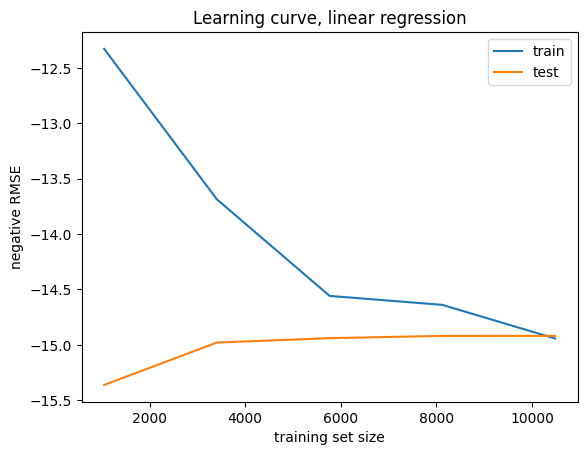

In [47]:
train_sizes, train_scores, test_scores = \
learning_curve(linear_reg, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.xlabel('training set size')
plt.ylabel('negative RMSE')
plt.title('Learning curve, linear regression')
plt.legend();

The result of the test RMSE, train RMSE and our learning curve shows that our mode is underfitting.

## Conclusion

This dataset was interesting to work with. It proved to be hard to work with at times. It was interesting to see the different statistics of players and where they rank overall, how much money players earn, their potential for growth, and a few other things. Before investigating, we did not know that there were so many attributes to a player and where they stand overall. From our findings, we now see that the best way to predict a players wage is by using a KNN regression model because it has a lower RMSE score compared to the linear regression model.